In [1]:
# Homework: 03-classification

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Dataset

In [3]:
url = 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'

In [4]:
data = pd.read_csv('bank-full.csv',sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
df = data[['age', 'job', 'marital', 'education', 'balance', 'housing','contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']]
df
# df_data=data[df]
# df_data

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Question 1

In [8]:
df['education'].mode()

0    secondary
Name: education, dtype: object

In [9]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Question 2

In [10]:
num=df.select_dtypes(include='number')
print(num)


       age  balance  day  duration  campaign  pdays  previous
0       58     2143    5       261         1     -1         0
1       44       29    5       151         1     -1         0
2       33        2    5        76         1     -1         0
3       47     1506    5        92         1     -1         0
4       33        1    5       198         1     -1         0
...    ...      ...  ...       ...       ...    ...       ...
45206   51      825   17       977         3     -1         0
45207   71     1729   17       456         2     -1         0
45208   72     5715   17      1127         5    184         3
45209   57      668   17       508         4     -1         0
45210   37     2971   17       361         2    188        11

[45211 rows x 7 columns]


In [11]:
print(num.corr())

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


<Axes: >

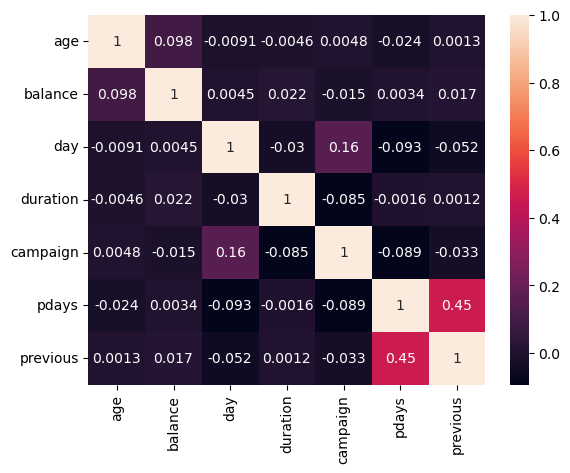

In [12]:
sns.heatmap(num.corr(), annot =True)
#pdays and previous

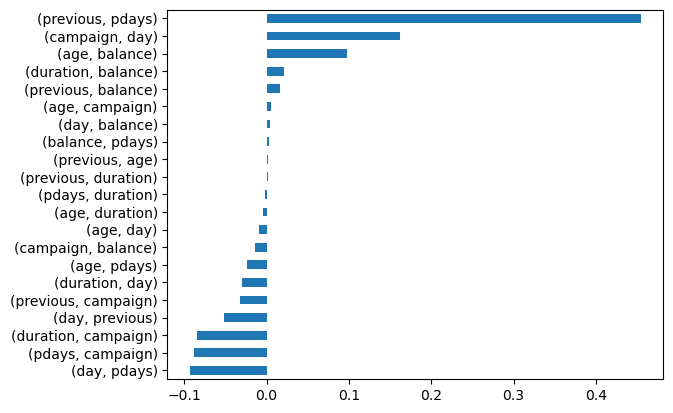

In [13]:
corr2 = num.corr().unstack().sort_values(ascending=True).drop_duplicates()
corr2 = corr2.drop(corr2.index[-1])
corr2.plot(kind="barh")
plt.show()

In [14]:
print(f"{corr2.index[-1][1]} and {corr2.index[-1][0]}")

pdays and previous


### target encoding

In [15]:
df.y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [16]:
df["y"].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [17]:
df['y'] = df['y'].replace({'yes': 1,'no':0})
df.y

C:\Users\sudwa\AppData\Local\Temp\ipykernel_12000\709207346.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['y'] = df['y'].replace({'yes': 1,'no':0})
C:\Users\sudwa\AppData\Local\Temp\ipykernel_12000\709207346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].replace({'yes': 1,'no':0})


0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [18]:
df.shape

(45211, 15)

### spilt data

In [19]:
# spilt data
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

df_full_train.shape, df_test.shape

((36168, 15), (9043, 15))

In [20]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
df_train.shape, df_val.shape

((27126, 15), (9042, 15))

In [21]:
len(df_train), len(df_val),len(df_test)

(27126, 9042, 9043)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train["y"].values
y_val = df_val["y"].values
y_test = df_test["y"].values

In [23]:
del df_train["y"]
del df_val["y"]
del df_test["y"]

In [24]:
df_full_train.y.value_counts()

y
0    31970
1     4198
Name: count, dtype: int64

In [25]:
df_full_train.y.value_counts(normalize= True)

y
0    0.883931
1    0.116069
Name: proportion, dtype: float64

In [26]:
global_rate = df_full_train.y.mean()
round(global_rate, 2)

0.12

In [27]:
cat_features = [
    "job",
    "marital",
    "education",
    "housing",
    "contact",
    "month",
    "poutcome",
]

In [28]:
for c in cat_features:
    print(c)
    df_group = df_full_train.groupby(c).y.agg(["mean", "count"])
    df_group["diff"] = df_group["mean"] - global_rate
    df_group["risk"] = df_group["mean"] / global_rate
    df_group.sort_values("risk", ascending=False, inplace=True)
    display(df_group)
    print()

job


,mean,count,diff,risk
job,,,,
student,0.278976,742,0.162906,2.403524
retired,0.222590,1815,0.106520,1.917727
unemployed,0.160313,1023,0.044243,1.381180
management,0.135467,7500,0.019397,1.167117
self-employed,0.122862,1286,0.006792,1.058518
admin.,0.119894,4137,0.003824,1.032947
unknown,0.111588,233,-0.004481,0.961390
technician,0.108760,6096,-0.007310,0.937024
housemaid,0.093812,1002,-0.022257,0.808243



marital


,mean,count,diff,risk
marital,,,,
single,0.147637,10221,0.031568,1.271973
divorced,0.119720,4143,0.003651,1.031451
married,0.100578,21804,-0.015492,0.866532



education


,mean,count,diff,risk
education,,,,
tertiary,0.148970,10539,0.032901,1.283460
unknown,0.127444,1483,0.011375,1.098001
secondary,0.105303,18670,-0.010767,0.907238
primary,0.086377,5476,-0.029693,0.744183



housing


,mean,count,diff,risk
housing,,,,
no,0.166407,16033,0.050337,1.433683
yes,0.075987,20135,-0.040082,0.654669



contact


,mean,count,diff,risk
contact,,,,
cellular,0.148270,23464,0.032200,1.277422
telephone,0.137128,2319,0.021059,1.181431
unknown,0.038613,10385,-0.077456,0.332675



month


,mean,count,diff,risk
month,,,,
mar,0.516043,374,0.399973,4.445983
sep,0.465517,464,0.349448,4.010678
dec,0.464481,183,0.348411,4.001749
oct,0.437396,599,0.321326,3.768396
apr,0.202645,2344,0.086576,1.745895
feb,0.156723,2112,0.040654,1.350256
aug,0.110954,4966,-0.005115,0.955932
nov,0.101481,3173,-0.014588,0.874315
jun,0.098888,4318,-0.017181,0.851976



poutcome


,mean,count,diff,risk
poutcome,,,,
success,0.641322,1210,0.525253,5.525332
other,0.170341,1497,0.054271,1.467575
failure,0.126891,3901,0.010821,1.093229
unknown,0.090392,29560,-0.025677,0.778779


### Question 3

In [29]:
from sklearn.metrics import mutual_info_score

In [30]:
def mutual_info_target_score(series):
    return mutual_info_score(series, df_full_train.y)

In [31]:
cats = [
    "education",
    "housing",
    "contact",
    "poutcome",
]

In [32]:
df_mutual_score = df_full_train[cats].apply(mutual_info_target_score).round(2)
df_mutual_score = df_mutual_score.sort_values(ascending=False)

display(df_mutual_score)

poutcome     0.03
housing      0.01
contact      0.01
education    0.00
dtype: float64

### Question 4

In [33]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver="liblinear", max_iter=1000, C=1.0, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [35]:
val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [36]:
accuracy = np.round(accuracy_score(y_val, y_pred), 2)
print(accuracy)

0.9


In [37]:
y_proba = model.predict_proba(X_val)[:,1] 

In [38]:
df_prediction = pd.DataFrame()
df_prediction['probability'] = y_proba
df_prediction['prediction'] = y_pred.astype(int)
df_prediction['actual'] = y_val
df_prediction['correct'] = df_prediction['prediction'] == df_prediction['actual'] 
df_prediction

,probability,prediction,actual,correct
0,0.012663,0,0,True
1,0.009701,0,0,True
2,0.153056,0,1,False
3,0.230069,0,0,True
4,0.445617,0,1,False
...,...,...,...,...
9037,0.022894,0,0,True
9038,0.268888,0,1,False
9039,0.053950,0,0,True
9040,0.008948,0,0,True


### Question 5

In [39]:
small = ['age', 'balance', 'marital', 'previous']
df_train[small].iloc[:10].to_dict(orient = 'records')

[{'age': 32, 'balance': 1100, 'marital': 'single', 'previous': 0},
 {'age': 38, 'balance': 0, 'marital': 'married', 'previous': 0},
 {'age': 49, 'balance': 3309, 'marital': 'married', 'previous': 0},
 {'age': 37, 'balance': 2410, 'marital': 'married', 'previous': 0},
 {'age': 31, 'balance': 3220, 'marital': 'married', 'previous': 0},
 {'age': 32, 'balance': 11287, 'marital': 'single', 'previous': 0},
 {'age': 35, 'balance': 0, 'marital': 'married', 'previous': 3},
 {'age': 39, 'balance': -17, 'marital': 'married', 'previous': 0},
 {'age': 60, 'balance': 2934, 'marital': 'single', 'previous': 0},
 {'age': 48, 'balance': 3, 'marital': 'married', 'previous': 0}]

In [40]:
dicts_train_small = df_train[small].to_dict(orient = 'records')
dicts_val_small = df_val[small].to_dict(orient = 'records')

In [41]:
# DictVectorizer
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [42]:
dv_small.get_feature_names_out()

array(['age', 'balance', 'marital=divorced', 'marital=married',
       'marital=single', 'previous'], dtype=object)

In [43]:
# Transform validation data once
X_train_small = dv_small.transform(dicts_train_small)

In [44]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

C:\Users\sudwa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
w0 = model_small.intercept_[0]
w0

-2.102645312268903

In [46]:
model_small.coef_[0]

array([ 1.64061446e-02,  3.39296736e-05, -7.96622048e-01, -9.51306260e-01,
       -3.48428331e-01,  1.10930064e-01])

In [47]:
features = df_train.columns.to_list()
features

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [48]:
original_score = accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, original_score - score]

In [49]:
scores

,eliminated_feature,accuracy,difference
0,age,0.900686,-0.000686
1,job,0.901239,-0.001239
2,marital,0.901128,-0.001128
3,education,0.900686,-0.000686
4,balance,0.901349,-0.001349
5,housing,0.901570,-0.001570
6,contact,0.900354,-0.000354
7,day,0.901017,-0.001017
8,month,0.899912,0.000088
9,duration,0.889958,0.010042


In [50]:
features = ['age', 'balance', 'marital', 'previous']
original_score = accuracy
scoress = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scoress.loc[len(scores)] = [feature, score, original_score - score]

In [51]:
scoress

,eliminated_feature,accuracy,difference
14,previous,0.881663,0.018337


### Question 6

In [52]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient="records")
X_val = dv.transform(val_dict)

In [53]:
import warnings

scores = {}
for C in [0.01, 0.1, 1, 10, 100]:
    # warnings.filterwarnings("ignore")

    model = LogisticRegression(
        C=C, solver="liblinear", random_state=42, max_iter=1000
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    score = accuracy_score(
        y_val,
        y_pred,
    )  # root_mean_squared_error
    scores[C] = round(score, 3)
    print(f"C = {C:>4}: accuracy_score = {round(score, 3)}")

C = 0.01: accuracy_score = 0.898
C =  0.1: accuracy_score = 0.901
C =    1: accuracy_score = 0.901
C =   10: accuracy_score = 0.901
C =  100: accuracy_score = 0.901
